In [ ]:
#https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/about_data
"""
The Fremont Bridge Bicycle Counter began operation in October 2012 and records the number of bikes that cross the
bridge using the pedestrian/bicycle pathways. Inductive loops on the east and west pathways count the passing of
bicycles regardless of travel direction. The data consists of a date/time field: Date, east pathway count field:
Fremont Bridge NB, and west pathway count field: Fremont Bridge SB.

The count fields represent the total bicycles detected during the specified one hour period.

Direction of travel is not specified, but in general most traffic
in the Fremont Bridge NB field is travelling northbound and most traffic in the Fremont Bridge SB field is
travelling southbound.

"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:

df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240527.csv')
df.head()

,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0


In [4]:
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240527.csv', index_col='Date', parse_dates=True)
df.head()

<ipython-input-4-20f28876607f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240527.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [5]:
df.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [6]:
df.dtypes

Fremont Bridge Sidewalks, south of N 34th St                          float64
Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk    float64
Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk    float64
dtype: object

In [7]:
df.index

DatetimeIndex(['2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               '2012-10-02 19:00:00', '2012-10-02 20:00:00',
               '2012-10-02 21:00:00', '2012-10-02 22:00:00',
               ...
               '2024-04-30 14:00:00', '2024-04-30 15:00:00',
               '2024-04-30 16:00:00', '2024-04-30 17:00:00',
               '2024-04-30 18:00:00', '2024-04-30 19:00:00',
               '2024-04-30 20:00:00', '2024-04-30 21:00:00',
               '2024-04-30 22:00:00', '2024-04-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=101483, freq=None)

In [8]:
df.columns = ['Total', 'West', 'East']
df.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [9]:
df.isnull().sum()

Total    28
West     28
East     28
dtype: int64

In [10]:
df.shape

(101483, 3)

In [11]:
#only drop rows/ cols where all vals are null - no effect
df.dropna(how="all")
df.isnull().sum()

Total    28
West     28
East     28
dtype: int64

In [12]:
# fill null vals - specify a forward fill to propagate the previous value forward
df = df.fillna(method="ffill")
df.isnull().sum()


Total    0
West     0
East     0
dtype: int64

In [13]:
df.describe()

,Total,West,East
count,101483.000000,101483.000000,101483.000000
mean,105.358070,45.498221,59.859848
std,131.748146,59.966380,81.597505
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,25.000000,32.000000
75%,143.000000,62.000000,78.000000
max,1097.000000,667.000000,850.000000


In [ ]:
df.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


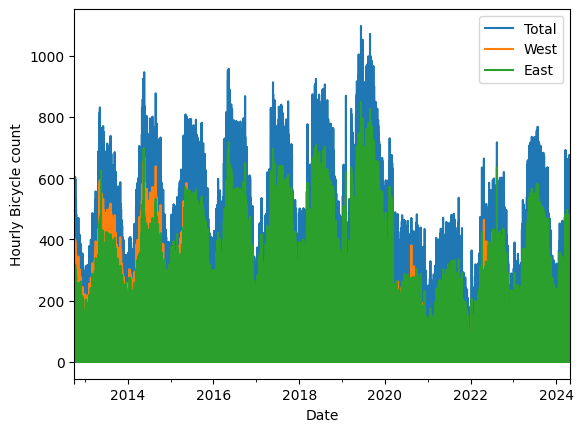

In [14]:
# visualize data
# hourly samples are too dense to make sense of.
df.plot()
plt.ylabel('Hourly Bicycle count');

Text(0.5, 1.0, 'Weekly bicyle crossings of the Bridge')

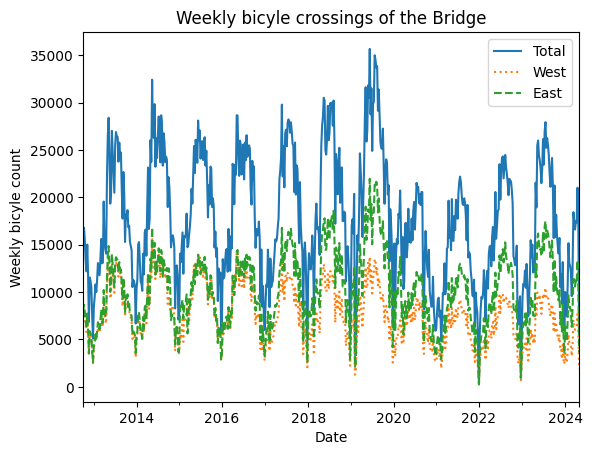

In [15]:
# resample by week
# Resampling generates a unique sampling distribution on the basis of the
# actual data
weekly = df.resample('W').sum() # add vals for each week
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicyle count');
plt.title('Weekly bicyle crossings of the Bridge')

In [ ]:
# Trends for graph above
"""
1) People bike more during summers
2) Bicycle use varies from week to week (later analysed)
3) Starting in 2020, Covid hit and commuting dropped.Stayed subdued in 2020 and
2021. Started increasing in 2022 and in 2023, it was a little less than
2013 level.

"""

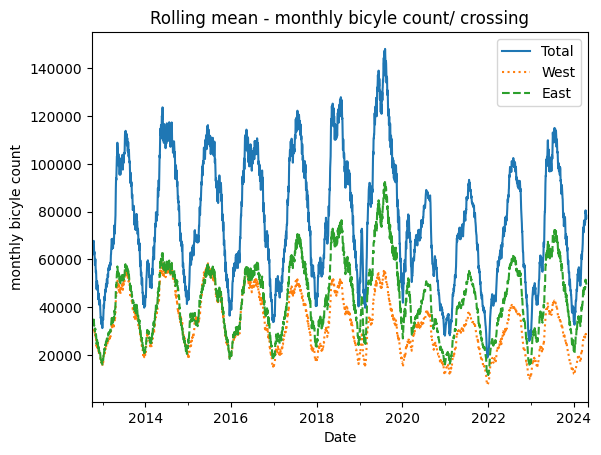

In [ ]:
# 30 day rolling mean
daily = df.resample('D').sum() # sum daily data
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--']) # take average over 30 days
plt.ylabel('monthly bicyle count');
plt.title('Rolling mean - monthly bicyle count/ crossing');

In [ ]:
# bytime = df.groupby(df.index.time)
# bytime.head()

In [ ]:
# average traffic by time of day
# find mean of data by time (date does not matter)
by_time = df.groupby(df.index.time).mean()
by_time

,Total,West,East
00:00:00,10.158467,4.463103,5.695364
01:00:00,5.427389,2.451750,2.975639
02:00:00,3.583018,1.595080,1.987938
03:00:00,2.603595,1.211684,1.391911
04:00:00,6.100757,2.748817,3.351939
05:00:00,22.584674,10.875118,11.709555
06:00:00,77.677152,36.905156,40.771996
07:00:00,192.486282,91.304163,101.182119
08:00:00,274.298013,125.040445,149.257569
09:00:00,168.078761,73.012299,95.066462


In [ ]:
by_time.sort_values(by=['Total'], ascending=[False]).head(5)
# Total Traffic is highest at 5 pm, 8 am, 6 pm, 4 pm, 7 am

,Total,West,East
17:00:00,346.650981,129.184441,217.466541
08:00:00,274.298013,125.040445,149.257569
18:00:00,236.492551,97.199811,139.292741
16:00:00,226.105462,88.277134,137.828328
07:00:00,192.486282,91.304163,101.182119


In [ ]:
by_time.sort_values(by=['West'], ascending=[False]).head(5)
# West Traffic is highest at 5 pm, 8 am, 6 pm, 7 am, 4 pm

,Total,West,East
17:00:00,346.650981,129.184441,217.466541
08:00:00,274.298013,125.040445,149.257569
18:00:00,236.492551,97.199811,139.292741
07:00:00,192.486282,91.304163,101.182119
16:00:00,226.105462,88.277134,137.828328


In [ ]:
by_time.sort_values(by=['East'], ascending=[False]).head(5)
# East Traffic is highest at 5 pm, 8 am, 6 pm, 4 pm, 7 am

,Total,West,East
17:00:00,346.650981,129.184441,217.466541
08:00:00,274.298013,125.040445,149.257569
18:00:00,236.492551,97.199811,139.292741
16:00:00,226.105462,88.277134,137.828328
07:00:00,192.486282,91.304163,101.182119


In [16]:
print(4 * 60 * 60 * np.arange(6))
# 72000/ 60 * 60 = 20 hours

[    0 14400 28800 43200 57600 72000]


In [ ]:
#df.index


In [ ]:
#df.index.time

array([datetime.time(13, 0), datetime.time(14, 0), datetime.time(15, 0),
       ..., datetime.time(21, 0), datetime.time(22, 0),
       datetime.time(23, 0)], dtype=object)

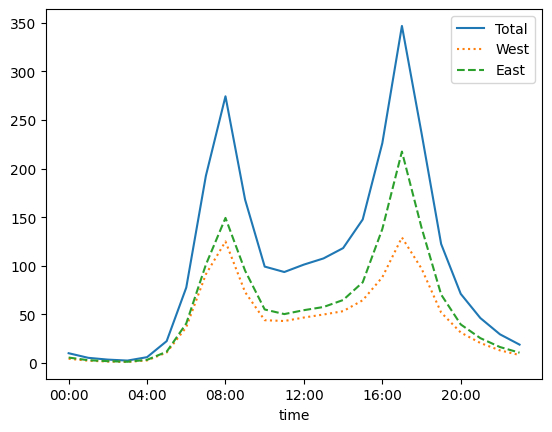

In [ ]:
# Display the traffic patterns - take 4 hour interval
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

# East is used more during pm commute and West is similarly used during am and pm commute.

In [ ]:
# how things change based on day of the week
#df.index.day_of_week

In [17]:
by_day = df.groupby(df.index.day_of_week).mean()
by_day.index = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_day

,Total,West,East
Mon,116.020902,49.442122,66.578780
Tue,128.785069,54.154546,74.630523
Wed,128.381967,54.349752,74.032216
Thurs,121.796978,51.427704,70.369274
Fri,108.920530,46.804360,62.116170
Sat,69.137555,32.049048,37.088507
Sun,64.445709,30.253449,34.192260


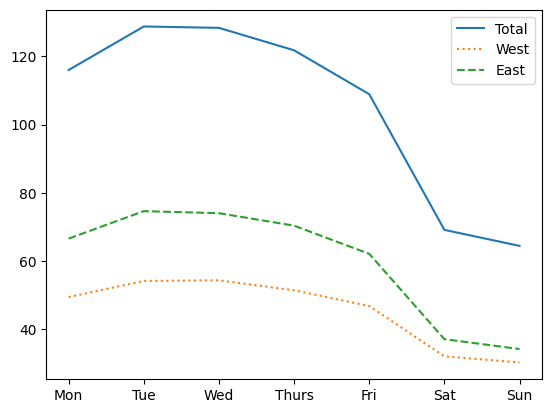

In [ ]:
by_day.plot(style=['-', ':', '--']);
'''
More than double riders ride bikes on weekdays than on weekends

'''

In [ ]:
# hourly trends on weekdays vs weekends

In [25]:
df.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [24]:
df.index.weekday

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=101483)

In [23]:
df.index.weekday < 5

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
#df.index.day_of_week

In [ ]:
#df.index.day_of_year

In [ ]:
df.index.weekday

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=101483)

In [ ]:
#df.index.dayofweek

In [19]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [22]:
by_time_1 = df.groupby([weekend, df.index.time]).mean()
by_time_1.head(30)

Total        West        East
Weekday 00:00:00    8.261921    3.600993    4.660927
        01:00:00    4.117550    1.839073    2.278477
        02:00:00    2.778146    1.188411    1.589735
        03:00:00    2.382119    1.166225    1.215894
        04:00:00    7.158609    3.286093    3.872517
        05:00:00   28.873179   13.963245   14.909934
        06:00:00  102.121523   48.710596   53.410927
        07:00:00  256.769536  122.052980  134.716556
        08:00:00  360.359272  164.025497  196.333775
        09:00:00  201.759272   86.362583  115.396689
        10:00:00   96.399669   41.931126   54.468543
        11:00:00   78.769536   36.045364   42.724172
        12:00:00   83.648344   38.411589   45.236755
        13:00:00   89.383648   40.927507   48.456140
        14:00:00  102.166501   44.655743   57.510758
        15:00:00  144.888779   61.074148   83.814631
        16:00:00  260.231380   97.100960  163.130420
        17:00:00  439.312479  159.376696  279.935783
        18:00:00  295.841443  119.653426  176.188017
        19:00:00  146.187355   61.495862   84.691493
        20:00:00   82.674942   36.244621   46.430321
        21:00:00   51.868587   23.441576   28.427011
        22:00:00   32.686197   14.328368   18.357829
        23:00:00   20.023833    8.750414   11.273419
Weekend 00:00:00   14.899834    6.618377    8.281457
        01:00:00    8.701987    3.983444    4.718543
        02:00:00    5.595199    2.611755    2.983444
        03:00:00    3.157285    1.325331    1.831954
        04:00:00    3.456126    1.405629    2.050497
        05:00:00    6.863411    3.154801    3.708609

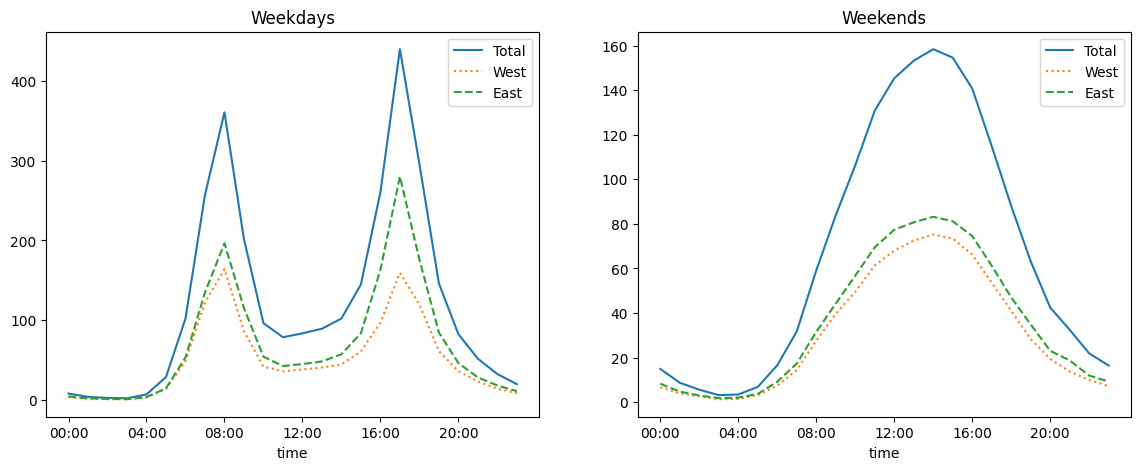

In [ ]:
# plot panels side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) # 1 r, 2 c
by_time_1.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=['-', ':', '--'])
by_time_1.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=['-', ':', '--']);

'''
Weekdays : Traffic peaks at 5 pm and 8 am
Weekends : Traffic peaks at 2 pm
'''

In [ ]:
# Predict bicycle traffic based on weather, season, and other factors